# Исследование

In [2]:
#from google.colab import drive
#drive.mount('/content/drive/')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Загрузка данных


In [3]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [4]:
data = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [5]:
data['TotalSpent'] = data['TotalSpent'].replace(' ', np.NaN).astype(float)
data['TotalSpent'] = data['TotalSpent'].fillna(0)

test_df['TotalSpent'] = test_df['TotalSpent'].replace(' ', np.NaN).astype(float)
test_df['TotalSpent'] = test_df['TotalSpent'].fillna(0)

In [6]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

## Анализ данных

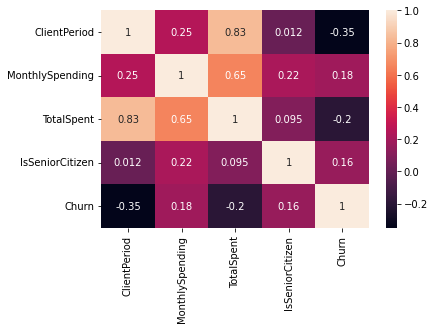

In [8]:
sns.heatmap(data.corr(), annot = True);

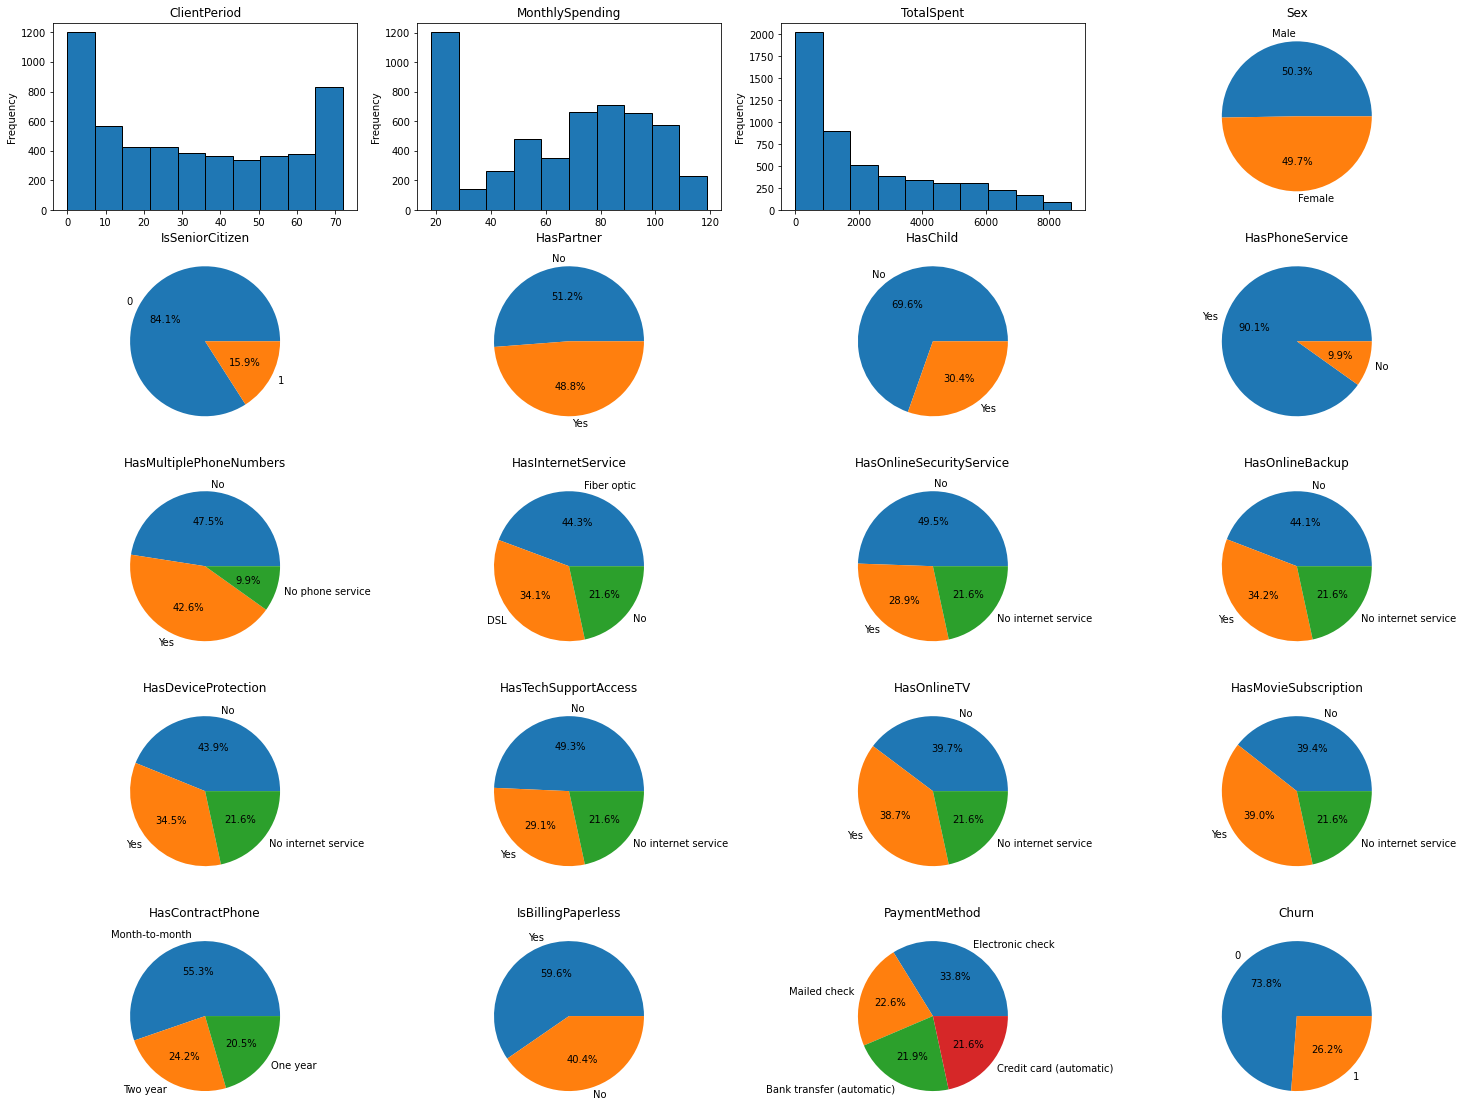

In [10]:
fig, axes = plt.subplots(5, 4, figsize=(25, 20))
for ax, col in zip(axes.flatten(), data.columns):
    ax.set_title(col)
    if col in cat_cols or col == target_col:
        ax.pie(data[col].value_counts(), autopct="%1.1f%%", labels=data[col].value_counts().index)
    else:
        data[col].plot(kind="hist", ec="black", ax=ax)

**Данные являются несбалансированными.**
В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

## Применение линейных моделей

In [36]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, LabelEncoder, normalize
from sklearn.pipeline import make_pipeline

In [37]:
data1 = pd.get_dummies(data[cat_cols])
data1 = pd.concat((pd.DataFrame(normalize(data[num_cols]), columns = num_cols), data1), axis=1)

test_df1 = pd.get_dummies(test_df[cat_cols])
test_df1 = pd.concat((pd.DataFrame(normalize(test_df[num_cols]), columns = num_cols), test_df1), axis=1)

In [38]:
data1.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.053502,0.018969,0.998388,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,0.038425,0.013796,0.999166,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
2,0.009316,0.707076,0.707076,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,0.012444,0.030839,0.999447,1,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
4,0.008876,0.017050,0.999815,0,1,0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0


In [39]:
lreg = LogisticRegression(max_iter =300)

# опишем сетку, по которой будем искать
param_grid = {
    'C': [100., 95., 90., 85., 60.],   
}
'''
'metric': ['manhattan', 'euclidean'],
    'weights': ['uniform', 'distance'],'''

# создадим объект GridSearchCV
search = GridSearchCV(lreg, param_grid, n_jobs=-1, cv=5, refit=True, scoring='roc_auc')

# запустим поиск
search.fit(data1, data[target_col])

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=300), n_jobs=-1,
             param_grid={'C': [100.0, 95.0, 90.0, 85.0, 60.0]},
             scoring='roc_auc')

In [40]:
search.best_params_

{'C': 90.0}

In [41]:
search.best_score_

0.846579230609192

In [42]:
roc_auc_score(data[target_col], search.best_estimator_.predict(data1))

0.7122364514780071

Лучшее качество

**0.846579230609192**

## Применение градиентного бустинга

In [43]:
#!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
from google.colab import output
output.enable_custom_widget_manager()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(data[feature_cols], data[target_col], train_size=0.7, random_state=42)

In [ ]:
catboost_do = CatBoostClassifier()
catboost_do.fit(X_train, y_train, cat_features=cat_cols)

In [47]:
roc_auc_score(y_test, catboost_do.predict_proba(X_test)[:, 1])

0.8321657854585873

In [ ]:
catboost = CatBoostClassifier(cat_features=cat_cols, eval_metric='AUC:hints=skip_train~false', silent=True)
catboost.grid_search({'l2_leaf_reg': np.linspace(0.12, 0.13, 3),
                      'iterations': (650,700,750),
                      'learning_rate' : np.linspace(0.025, 0.035, 3),
                      'depth': (2, 3, 4), 
                      },  data[feature_cols],
                          data[target_col],
                          #X_train, 
                          #y_train, 
                          #plot=True,
                          search_by_train_test_split=True,
                          refit=True)

Лучшее качество и параметры

0.8598463026 'params': {'depth': 1,
  'iterations': 400,
  'learning_rate': 0.03115,
  'l2_leaf_reg': 0.16}, Training on fold [2/3]

# Предсказания

In [53]:
best_model = CatBoostClassifier(iterations=650, l2_leaf_reg=0.125, learning_rate = 0.035, depth = 3,  logging_level='Silent',cat_features=cat_cols, eval_metric='AUC:hints=skip_train~false')
best_model.fit(data[feature_cols], data[target_col], cat_features=cat_cols)

In [56]:
X_test = pd.read_csv('/content/drive/MyDrive/colab/test.csv')

submission = pd.read_csv('/content/drive/MyDrive/colab/submission.csv')

submission['Churn'] = best_model.predict_proba(test_df)[:,1]
submission.to_csv('/content/drive/MyDrive/colab/submission1.csv', index = False)

### Score: 0.85432
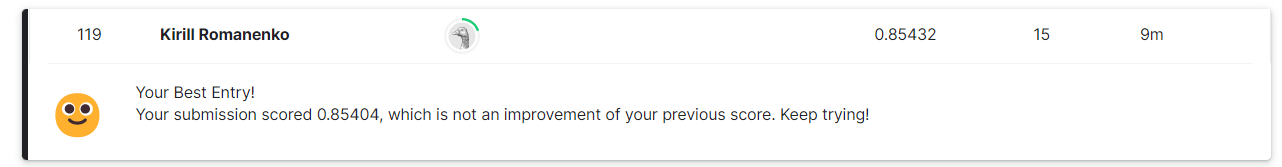

# Kaggle (5 баллов)

https://www.kaggle.com/competitions/advanced-dls-spring-2021/overview